# SECANT METHOD

In [ ]:
import math

# Function to evaluate f(x)
def f(x, equation):
    return eval(equation, {"x": x, "log": math.log, "math": math})


def secant_method(equation, a, b, tol=0.001, max_iter=100):
    print("\n{:<10} {:<12} {:<12} {:<12} {:<12} {:<12}".format(
        "Iteration", "a", "b", "f(a)", "f(b)", "c"))

    extra_iters = 0  # Track extra iterations after root is found
    root_found = False

    for i in range(1, max_iter + 1):
        fa = f(a, equation)
        fb = f(b, equation)

        if fb - fa == 0:
            print("Division by zero. Method fails.")
            return None

        c = (a * fb - b * fa) / (fb - fa)

        print("{:<10} {:<12.6f} {:<12.6f} {:<12.6f} {:<12.6f} {:<12.6f}".format(
            i, a, b, fa, fb, c))

        fc = f(c, equation)

        # Root found condition
        if not root_found and abs(fc) < tol:
            root_found = True
            print(f"\n✅ Root found: {c:.6f} (correct to 3 decimal places)\n")
            # Start counting extra iterations now
            extra_iters = 2

        elif root_found:
            extra_iters -= 1
            if extra_iters == 0:
                print(f"\n🛑 Stopping after 2 additional iterations.")
                return c

        a, b = b, c

    print("\n❌ Method did not converge within maximum iterations.")
    return None

# === INPUT ===
equation_input = input("Enter the function f(x), use 'x' as variable (e.g., x**3 - x - 2): ")
a_input = float(input("Enter initial guess a: "))
b_input = float(input("Enter initial guess b: "))

# === RUN ===
secant_method(equation_input, a_input, b_input)


Enter the function f(x), use 'x' as variable (e.g., x**3 - x - 2): x**2 -30
Enter initial guess a: 5
Enter initial guess b: 6

Iteration  a            b            f(a)         f(b)         c           
1          5.000000     6.000000     -5.000000    6.000000     5.454545    
2          6.000000     5.454545     6.000000     -0.247934    5.476190    
3          5.454545     5.476190     -0.247934    -0.011338    5.477228    

✅ Root found: 5.477228 (correct to 3 decimal places)

4          5.476190     5.477228     -0.011338    0.000024     5.477226    
5          5.477228     5.477226     0.000024     -0.000000    5.477226    

🛑 Stopping after 2 additional iterations.


5.477225575051661

# NEWTON RAPHSON METHOD

In [ ]:
import math
import re
from sympy import symbols, diff, lambdify, cos, exp
from sympy.parsing.sympy_parser import parse_expr

def newton_raphson(equation_str, a, tol=0.001, max_iter=100):
    x = symbols('x')

    # Fix e^x -> exp(x)
    equation_str = re.sub(r"e\^([a-zA-Z0-9_()+\-*/\.]+)", r"exp(\1)", equation_str)

    # Replace ^ with ** (power operator)
    equation_str = equation_str.replace('^', '**')

    # Replace '=' with '-' to get f(x) = 0 form
    equation_str = equation_str.replace('=', '-')

    local_dict = {'x': x, 'cos': cos, 'exp': exp}

    fx_sym = parse_expr(equation_str, local_dict=local_dict)

    f_prime_sym = diff(fx_sym, x)

    f = lambdify(x, fx_sym, modules=['math'])
    f_prime = lambdify(x, f_prime_sym, modules=['math'])

    print("\n{:<10} {:<12} {:<12}".format("Iteration", "a", "b"))

    root_found = False
    extra_iters = 0

    for i in range(1, max_iter + 1):
        fa = f(a)
        fpa = f_prime(a)

        if fpa == 0:
            print("Derivative zero. Method fails.")
            return None

        b = a - (fa / fpa)

        print("{:<10} {:<12.6f} {:<12.6f}".format(i, a, b))

        if not root_found and abs(f(b)) < tol:
            root_found = True
            print(f"\n✅ Root found: {b:.6f} (correct to 3 decimal places)\n")
            extra_iters = 2

        elif root_found:
            extra_iters -= 1
            if extra_iters == 0:
                print("🛑 Stopping after 2 additional iterations.")
                return b

        a = b

    print("❌ Method did not converge within maximum iterations.")
    return None

# === INPUT ===
equation_input = input("Enter the function f(x), use 'x' as variable (e.g., cos(x) = x * e^x): ")
a_input = float(input("Enter initial guess a: "))

# === RUN ===
newton_raphson(equation_input, a_input)


Enter the function f(x), use 'x' as variable (e.g., cos(x) = x * e^x): 10 *exp(-x) * sin(2 * 3.1415 * x) - 2
Enter initial guess a: 0.125

Iteration  a            b           
1          0.125000     -0.003611   
2          -0.003611    0.031599    
3          0.031599     0.033140    

✅ Root found: 0.033140 (correct to 3 decimal places)

4          0.033140     0.033144    
5          0.033144     0.033144    
🛑 Stopping after 2 additional iterations.


0.03314365690606133

# REGULA FALSI METHOD

In [ ]:
import math

# Function to evaluate f(x)
def f(x, equation):
    return eval(equation, {"x": x, "math": math})

def regula_falsi(equation, a, b, tol=0.001, max_iter=100):
    print("\n{:<10} {:<12} {:<12} {:<12} {:<12} {:<12} {:<12}".format(
        "Iteration", "a", "b", "f(a)", "f(b)", "c", "f(c)"))

    root_found = False
    extra_iters = 0

    for i in range(1, max_iter + 1):
        fa = f(a, equation)
        fb = f(b, equation)

        if fb - fa == 0:
            print("Division by zero. Method fails.")
            return None

        # Regula Falsi formula
        c = (a * fb - b * fa) / (fb - fa)
        fc = f(c, equation)

        print("{:<10} {:<12.5f} {:<12.5f} {:<12.5f} {:<12.5f} {:<12.5f} {:<12.5f}".format(
            i, a, b, fa, fb, c, fc))

        # Check if root found to 3 decimal places
        if not root_found and abs(fc) < tol:
            root_found = True
            print(f"\n✅ Root found: {c:.5f} (correct to 3 decimal places)\n")
            extra_iters = 2

        elif root_found:
            extra_iters -= 1
            if extra_iters == 0:
                print("🛑 Stopping after 2 additional iterations.")
                return c

        # Update interval
        if fa * fc < 0:
            b = c
        else:
            a = c

    print("\n❌ Method did not converge within maximum iterations.")
    return None

# === INPUT ===
equation_input = input("Enter the function f(x), use 'x' as variable (e.g., x**3 - x - 2): ")
a_input = float(input("Enter initial guess a (lower bound): "))
b_input = float(input("Enter initial guess b (upper bound): "))

# === RUN ===
regula_falsi(equation_input, a_input, b_input)



Enter the function f(x), use 'x' as variable (e.g., x**3 - x - 2): x * math.tan(x) + 1
Enter initial guess a (lower bound): 1.5
Enter initial guess b (upper bound): 1.7

Iteration  a            b            f(a)         f(b)         c            f(c)        
1          1.50000      1.70000      22.15213     -12.08422    1.62941      -26.76865   
2          1.50000      1.62941      22.15213     -26.76865    1.55860      128.76133   
3          1.55860      1.62941      128.76133    -26.76865    1.61722      -33.81116   
4          1.55860      1.61722      128.76133    -33.81116    1.60503      -45.86909   
5          1.55860      1.60503      128.76133    -45.86909    1.59283      -71.27149   
6          1.55860      1.59283      128.76133    -71.27149    1.58063      -159.65754  
7          1.55860      1.58063      128.76133    -159.65754   1.56844      665.43203   
8          1.56844      1.58063      665.43203    -159.65754   1.57827      -210.05982  
9          1.56844      1.578

# BISECTION METHOD

In [ ]:
import math

# Function to evaluate f(x)
def f(x, equation):
    return eval(equation, {"x": x, "math": math})

def bisection_method(equation, a, b, tol=0.001, max_iter=100):
    print("\n{:<10} {:<12} {:<12} {:<12} {:<12}".format(
        "Iteration", "a", "b", "c", "f(c)"))

    if f(a, equation) * f(b, equation) >= 0:
        print("❌ f(a) and f(b) must have opposite signs. Try different guesses.")
        return

    root_found = False
    extra_iters = 0

    for i in range(1, max_iter + 1):
        c = (a + b) / 2
        fc = f(c, equation)

        print("{:<10} {:<12.5f} {:<12.5f} {:<12.5f} {:<12.5f}".format(i, a, b, c, fc))

        if not root_found and abs(fc) < tol:
            root_found = True
            print(f"\n✅ Root found: {c:.5f} (accurate to 3 decimal places)\n")
            extra_iters = 2

        elif root_found:
            extra_iters -= 1
            if extra_iters == 0:
                print("🛑 Stopping after 2 additional iterations.")
                return

        # Update the interval
        if f(a, equation) * fc < 0:
            b = c
        else:
            a = c

    print("\n❌ Method did not converge within the maximum number of iterations.")

# === INPUT ===
equation_input = input("Enter the function f(x), use 'x' as variable (e.g., x**3 - x - 2): ")
a_input = float(input("Enter initial guess a (lower bound): "))
b_input = float(input("Enter initial guess b (upper bound): "))

# === RUN ===
bisection_method(equation_input, a_input, b_input)



KeyboardInterrupt: Interrupted by user

# Iterative method

In [ ]:
import math

# Function to evaluate g(x)
def g(x, equation):
    return eval(equation, {
        "x": x, "log": math.log, "exp": math.exp,
        "sin": math.sin, "cos": math.cos, "math": math
    })

def iterative_method(g_eqn, x0, tol=0.0001, max_iter=100):
    print("\n{:<10} {:<15} {:<15}".format("Iteration", "x", "g(x)"))
    print("-" * 40)

    extra_iters = 0
    root_found = False

    for i in range(1, max_iter + 1):
        x1 = g(x0, g_eqn)

        print("{:<10} {:<15.6f} {:<15.6f}".format(i, x0, x1))

        if not root_found and abs(x1 - x0) < tol:
            root_found = True
            extra_iters = 2
            print(f"\n✅ Converged to root: {x1:.6f} in {i} iterations (tolerance: {tol})")

        elif root_found:
            extra_iters -= 1
            if extra_iters == 0:
                print(f"\n🛑 Stopped after 2 additional iterations.")
                return x1

        x0 = x1

    print("\n❌ Method did not converge within the maximum number of iterations.")
    return None

# === INPUT ===
print("Note: You must enter the function in the form x = g(x)")
g_input = input("Enter the iteration function g(x): ")
x0_input = float(input("Enter initial guess x₀: "))

# === RUN ===
iterative_method(g_input, x0_input)


Note: You must enter the function in the form x = g(x)
Enter the iteration function g(x):  0.5 * (math.cos(x) + 3)
Enter initial guess x₀: 1.5

Iteration  x               g(x)           
----------------------------------------
1          1.500000        1.535369       
2          1.535369        1.517710       
3          1.517710        1.526531       
4          1.526531        1.522126       
5          1.522126        1.524326       
6          1.524326        1.523227       
7          1.523227        1.523776       
8          1.523776        1.523502       
9          1.523502        1.523639       
10         1.523639        1.523570       

✅ Converged to root: 1.523570 in 10 iterations (tolerance: 0.0001)
11         1.523570        1.523604       
12         1.523604        1.523587       

🛑 Stopped after 2 additional iterations.


1.5235872524404233

# Bisection method (sir ko)

In [ ]:
# Bisection method (cleaned up version)
import math
import numpy as np

eqn = input("Enter the equation in python syntax: ")

def F(x, eqn):
    return eval(eqn, {"x": x, "exp": np.exp})

def f(x):
    return F(x, eqn)

a = float(input("Enter the first initial guess: "))
b = float(input("Enter the second initial guess: "))
m = []

if f(a) * f(b) > 0:
    print(f"No root lies in the interval ({a}, {b})")

else:
    e = float(input("Enter the tolerable error: "))
    N = int(input("Enter the maximum number of iterations: "))
    i = 1

    while i <= N:
        c = (a + b) / 2
        m.append(c)
        fc = f(c)

        print(f"Iteration {i}: a = {a:.5f}, b = {b:.5f}, c = {c:.5f}, f(c) = {fc:.5f}")

        if f(a) * fc < 0:
            b = c
        else:
            a = c

        error = abs(b - a)
        if error < e:
            print(f"\n✅ Approximate root = {(a + b)/2:.5f} found in {i} iterations (tolerance: {e})")
            break

        i += 1

    if i > N:
        print(f"\n❌ Maximum iterations ({N}) reached. Solution may not have converged.")




Enter the equation in python syntax: exp(x)+x-2
Enter the first initial guess: 0
Enter the second initial guess: 1
Enter the tolerable error: 0.001
Enter the maximum number of iterations: 100
Iteration 1: a = 0.00000, b = 1.00000, c = 0.50000, f(c) = 0.14872
Iteration 2: a = 0.00000, b = 0.50000, c = 0.25000, f(c) = -0.46597
Iteration 3: a = 0.25000, b = 0.50000, c = 0.37500, f(c) = -0.17001
Iteration 4: a = 0.37500, b = 0.50000, c = 0.43750, f(c) = -0.01367
Iteration 5: a = 0.43750, b = 0.50000, c = 0.46875, f(c) = 0.06675
Iteration 6: a = 0.43750, b = 0.46875, c = 0.45312, f(c) = 0.02635
Iteration 7: a = 0.43750, b = 0.45312, c = 0.44531, f(c) = 0.00629
Iteration 8: a = 0.43750, b = 0.44531, c = 0.44141, f(c) = -0.00370
Iteration 9: a = 0.44141, b = 0.44531, c = 0.44336, f(c) = 0.00129
Iteration 10: a = 0.44141, b = 0.44336, c = 0.44238, f(c) = -0.00121

✅ Approximate root = 0.44287 found in 10 iterations (tolerance: 0.001)


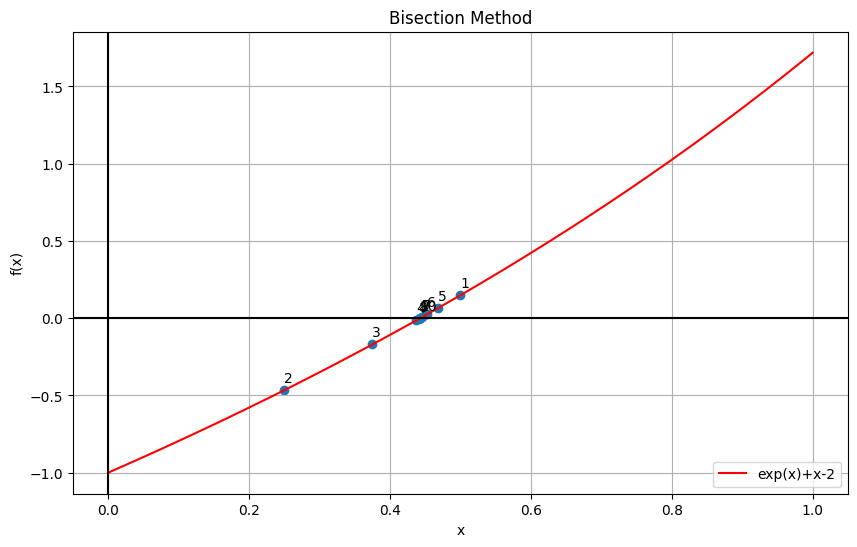

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# The 'm' list should already be populated from your bisection method logic.
# Ensure 'a' and 'b' are also defined from previous steps.

# Convert m to a NumPy array here, if it's still a list from the bisection loop.
# This should be the only 'm = np.array(m)' line in this block.
m = np.array(m)            #converts the variable m (a list) into a NumPy array.




x = np.linspace(0, 1, 1000)     #creates a numpy array "x" with 1000 values (0.001.......0.999). We put 1000 as our tolorable error is 0.001

plt.figure(figsize=(10, 6))
plt.plot(x, f(x), color='red', label=eqn)      #Plots the graph of the function f(x) against the values in the array x.
#label=eqn is for the legend() below
plt.axhline(0, color='black') # Simplified from (0,0)
plt.axvline(0, color='black') # Simplified from (0,0)
plt.legend()        #used to show that small box on the bottom right corner
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.title('Bisection Method')
plt.scatter(m, f(m))

for i, val in enumerate(m):                        #index ->> i
    plt.text(val, f(val) + 0.05, f'{i+1}')          #(x-axis, y-axis, which number to display)

plt.show()

# regula falsi(lab)

In [ ]:
import math  # Needed for math functions like sin, exp, etc.
import numpy as np

# Input the equation
eqn = input("Enter the equation in python syntax (use 'x' as variable): ")

# Function to evaluate f(x)
def F(x, eqn):
    return eval(eqn, {"x": x, "exp": np.exp})

def f(x):
    return F(x, eqn)

# Initial guesses
a = float(input("Enter the first initial guess (a): "))
b = float(input("Enter the second initial guess (b): "))
n = []

# Check if root exists in interval
if f(a) * f(b) > 0:
    print(f"❌ No root lies in the interval ({a}, {b})")
else:
    e = float(input("Enter the tolerable error: "))
    N = int(input("Enter the maximum number of iterations: "))

    print("\n{:<10} {:<12} {:<12} {:<12} {:<12} {:<12}".format(
      "Iteration", "a", "b", "f(a)", "f(b)", "c"))
    print("-" * 70)

    i = 1
    while i <= N:
        fa = f(a)
        fb = f(b)
        c = (a * fb - b * fa) / (fb - fa)
        n.append(c)
        fc = f(c)

        print("{:<10} {:<12.5f} {:<12.5f} {:<12.5f} {:<12.5f} {:<12.5f}".format(
            i, a, b, fa, fb, c))

        if abs(fc) < e:
            print(f"\n✅ Approximate root = {c:.5f} found in {i} iterations (tolerance: {e})")
            break

        if fa * fc < 0:
            b = c
        else:
            a = c

        i += 1

    if i > N:
        print(f"\n❌ Maximum iterations ({N}) reached. Solution may not have converged.")


Enter the equation in python syntax (use 'x' as variable): exp(x)+x-2
Enter the first initial guess (a): 0
Enter the second initial guess (b): 1
Enter the tolerable error: 0.001
Enter the maximum number of iterations: 100

Iteration  a            b            f(a)         f(b)         c           
----------------------------------------------------------------------
1          0.00000      1.00000      -1.00000     1.71828      0.36788     
2          0.36788      1.00000      -0.18745     1.71828      0.43006     
3          0.43006      1.00000      -0.03260     1.71828      0.44067     
4          0.44067      1.00000      -0.00559     1.71828      0.44248     

✅ Approximate root = 0.44248 found in 4 iterations (tolerance: 0.001)


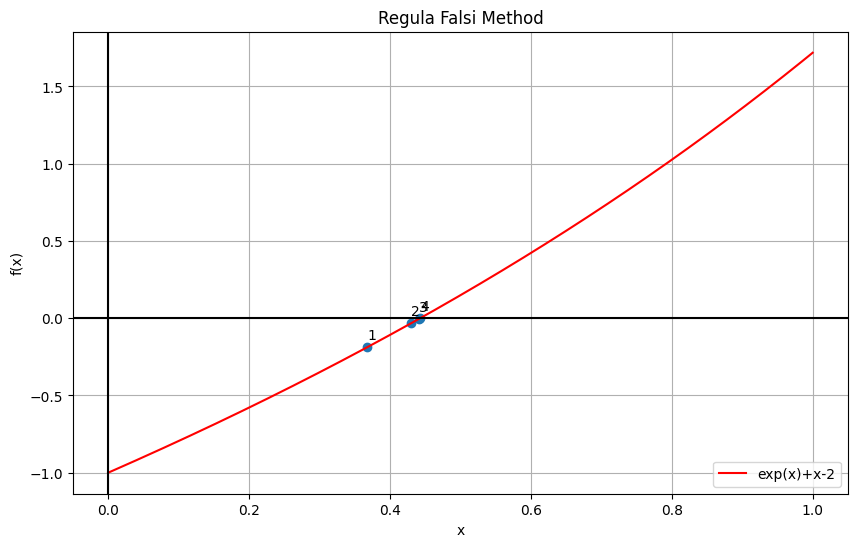

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# The 'n' list should already be populated from your Regula Falsi method logic.
# Ensure 'a' and 'b' are also defined from previous steps.

# Convert n to a NumPy array here, if it's still a list from the Regula Falsi loop.
# This should be the only 'n = np.array(n)' line in this block.

n = np.array(n)

x = np.linspace(0, 1, 1000)
plt.figure(figsize=(10, 6))
plt.plot(x, f(x), color='red', label=eqn)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.title('Regula Falsi Method')  # Changed title to Regula Falsi
if n.size > 0: # Only attempt to scatter plot if 'n' has data
    plt.scatter(n, f(n)) # Removed color and zorder for simplicity
    for i, val in enumerate(n):
        plt.text(val, f(val) + 0.05, f'{i+1}') # Fixed offset, no bbox or dynamic calculation

plt.show()

# Secant method (lab)

Enter the equation (use numpy functions like exp(x), sin(x)): exp(x)+x-2
Enter the first guess: 0
Enter the second guess: 1
Enter the error tolerance: 0.001
Enter the number of iterations: 100
 itr        a        b        c      f(a)      f(b)      f(c)
   1 0.000000 1.000000 0.367879 -1.000000  1.718282 -0.187453
   2 1.000000 0.367879 0.430056  1.718282 -0.187453 -0.032599
   3 0.367879 0.430056 0.443146 -0.187453 -0.032599  0.000745
The root of the equation is: 0.4431457539835316 in 3 iterations


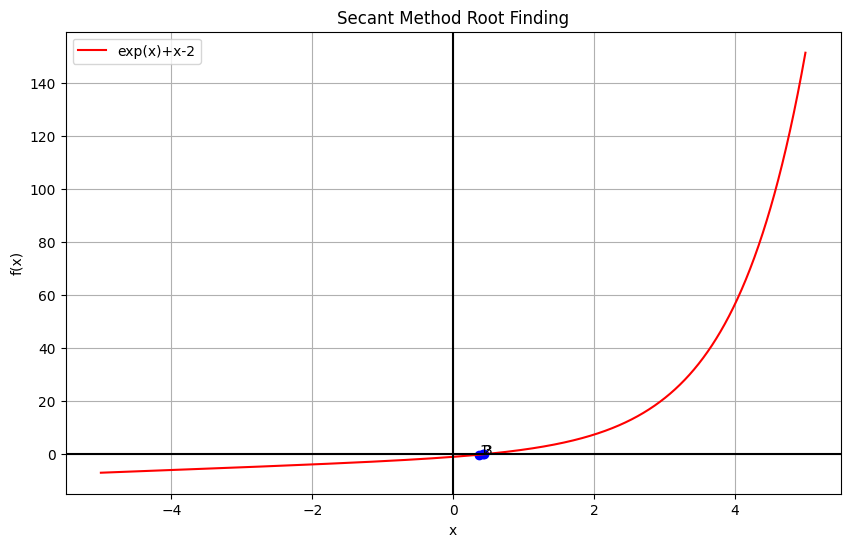

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Input the equation: use numpy functions like exp(x), sin(x), etc.
eqn = input("Enter the equation (use numpy functions like exp(x), sin(x)): ")

# Define f(x) to support both scalar and numpy array inputs using numpy functions
def f(x):

        #'sin': np.sin,
        #'cos': np.cos,
        #'log': np.log,
       # 'sqrt': np.sqrt,
        # add more numpy functions if needed

    return eval(eqn, {
        'x': x,
        'exp': np.exp,})

# Get initial guesses
a = float(input("Enter the first guess: "))
b = float(input("Enter the second guess: "))

A = []  # to store iteration info
m = []  # to store roots approximations

if f(a) == f(b):
    print("Value becomes infinite. Choose another guess.")
else:
    e = float(input("Enter the error tolerance: "))
    N = int(input("Enter the number of iterations: "))
    itr = 1
    while itr <= N:
        fa = f(a)
        fb = f(b)
        c = (a * fb - b * fa) / (fb - fa)
        fc = f(c)
        m.append(c)
        A.append([itr, a, b, c, fa, fb, fc])
        err = abs(fc)
        if err < e:
            df = pd.DataFrame(A, columns=['itr', 'a', 'b', 'c', 'f(a)', 'f(b)', 'f(c)'])
            print(df.to_string(index=False))
            print(f"The root of the equation is: {c} in {itr} iterations")
            break
        a, b = b, c
        itr += 1
    if itr > N:
        print("Root did not converge in the given iterations")

# Plotting
m = np.array(m)

x = np.linspace(-5, +5, 2000)  # Range centered around root guesses

plt.figure(figsize=(10, 6))
plt.plot(x, f(x), label=eqn, color='red')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Secant Method Root Finding')
plt.grid(True)
plt.legend()

plt.scatter(m, f(m), color='blue')

for i, val in enumerate(m):
    plt.text(val, f(val) + 0.05, f'{i+1}')  # slightly above each point

plt.show()


NEWTON RAPHSON METHOD (lab)


Enter the equation (use numpy functions like exp(x), sin(x)): exp(x)+x-2
Enter the initial guess: 0.5
Enter the error tolerance: 0.001
Enter the maximum number of iterations: 100
 Iteration        a     f(a)     g(a)        b
         1 0.500000 0.148721 2.648721 0.443852
         2 0.443852 0.002551 2.558700 0.442855

The root of the equation is approximately: 0.4428547040825779 in 2 iterations


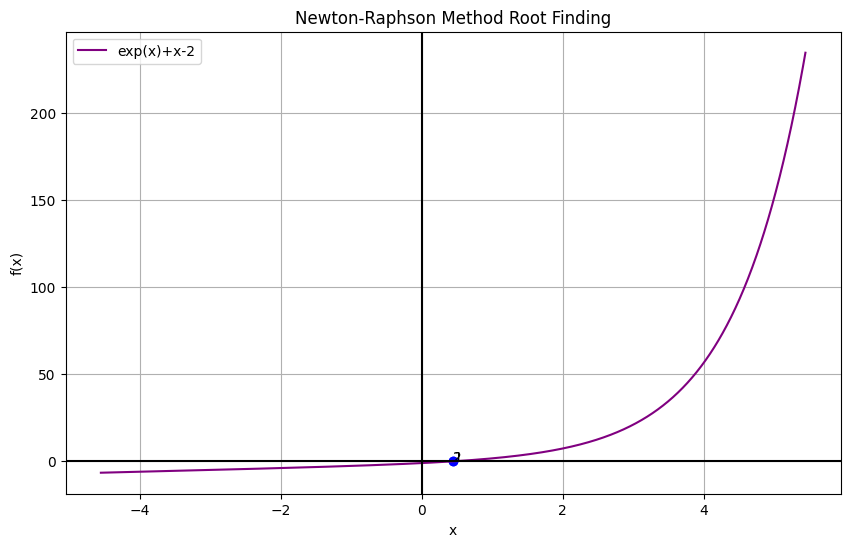

In [ ]:
#NEWTON RAPHSON METHOD
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Input equation using numpy syntax (e.g. exp(x), sin(x))
eqn = input("Enter the equation (use numpy functions like exp(x), sin(x)): ")

# Function to evaluate f(x) safely with numpy functions
def f(x):

        #'sin': np.sin,
        #'cos': np.cos,
        #'log': np.log,
       # 'sqrt': np.sqrt,
        # add more numpy functions if needed

    return eval(eqn, {
        'x': x,
        'exp': np.exp,})

# Numerical derivative (central difference)
def g(f, x, h=1e-10):
    return (f(x + h) - f(x - h)) / (2 * h)

A = []  # to store iteration data
m = []  # to store root approximations for plotting

a = float(input("Enter the initial guess: "))

if g(f, a) == 0:
    print("First derivative of the function at initial guess is zero. Try a different guess.")
else:
    e = float(input("Enter the error tolerance: "))
    N = int(input("Enter the maximum number of iterations: "))
    itr = 1
    while itr <= N:
        fa = f(a)
        ga = g(f, a)
        if ga == 0:
            print("Zero derivative encountered during iterations. Stopping.")
            break
        b = a - fa / ga
        A.append([itr, a, fa, ga, b])
        m.append(b)
        err = abs(f(b))

        if err < e:
            df = pd.DataFrame(A, columns=['Iteration', 'a', 'f(a)', "g(a)", 'b'])
            print( df.to_string(index=False))
            print(f"\nThe root of the equation is approximately: {b} in {itr} iterations")
            break
        a = b
        itr += 1
    else:
        print("Root did not converge within the given iterations.")

# Plotting
m = np.array(m)

x = np.linspace(min(m) - 5, max(m) + 5, 2000)

plt.figure(figsize=(10, 6))
plt.plot(x, f(x), label=eqn, color='purple')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Newton-Raphson Method Root Finding')
plt.grid(True)
plt.legend()

plt.scatter(m, f(m), color='blue')

for i, val in enumerate(m):
    plt.text(val, f(val) + 0.05, f'{i+1}')

plt.show()



secant chatgpt


In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

# Input equation with np. functions for plotting and math. functions for computation
eqn = input('Enter the equation in terms of x (use math. for input, e.g., math.exp(x) + x - 2): ')

# Function for scalar evaluation (for secant iteration)
def F(x, eqn):
    return eval(eqn, {'x': x, 'math': math})

def f(x):
    return F(x, eqn)

# Function for array-safe plotting (with np)
def f_plot(x_array):
    return eval(eqn, {'x': x_array, 'np': np})

# Initial guesses
a = float(input('Enter the first guess: '))
b = float(input('Enter the second guess: '))
A = []
m = []

if f(a) == f(b):
    print('❌ Value becomes infinite. Choose another guess.')
else:
    e = float(input('Enter the error tolerance: '))
    N = int(input('Enter the number of iterations: '))
    itr = 1
    found = False

    while itr <= N:
        c = (a * f(b) - b * f(a)) / (f(b) - f(a))
        m.append(c)
        A.append([itr, a, b, c, f(a), f(b), f(c)])
        err = abs(f(c))

        if err < e:
            found = True
            df = pd.DataFrame(A, columns=['Itr', 'a', 'b', 'c', 'f(a)', 'f(b)', 'f(c)'])
            print(df.to_string(index=False))
            print(f'\n✅ The root of the equation is approximately: {c:.6f} (in {itr} iterations)')

            # Plot
            m = np.array(m)
            x = np.linspace(0, 1, 1000)
            plt.figure(figsize=(10, 6))
            plt.plot(x, f_plot(x), color='red', label=f'f(x) = {eqn}')
            plt.axhline(0, color='black')
            plt.axvline(0, color='black')
            plt.scatter(m, f_plot(m), color='blue', zorder=5)

            #for i, val in enumerate(m):
             #   plt.text(val, f_plot(val) + 0.05, f'{i+1}', fontsize=8)

            plt.xlabel('x')
            plt.ylabel('f(x)')
            plt.title('Secant Method')
            plt.grid(True)
            plt.legend()
            plt.show()
            break

        a, b = b, c
        itr += 1

    if not found:
        print('❌ Root did not converge in the given number of iterations.')


Enter the equation in terms of x (use math. for input, e.g., math.exp(x) + x - 2): math.exp(x)+x-2
Enter the first guess: 0
Enter the second guess: 1
Enter the error tolerance: 0.001
Enter the number of iterations: 100
 Itr        a        b        c      f(a)      f(b)      f(c)
   1 0.000000 1.000000 0.367879 -1.000000  1.718282 -0.187453
   2 1.000000 0.367879 0.430056  1.718282 -0.187453 -0.032599
   3 0.367879 0.430056 0.443146 -0.187453 -0.032599  0.000745

✅ The root of the equation is approximately: 0.443146 (in 3 iterations)


NameError: name 'math' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
# BLOCK 1 - Root Calculation using Secant Method
import pandas as pd
import numpy as np
import math

eqn = input('Enter the equation (use math. functions like math.exp(x), math.sin(x), etc.): ')

def f(x):
    return eval(eqn, {'x': x, 'math': math})

a = float(input('Enter the first guess: '))
b = float(input('Enter the second guess: '))
e = float(input('Enter the error tolerance: '))
N = int(input('Enter the number of iterations: '))

A = []
m = []

if f(a) == f(b):
    print('Value becomes infinite. Choose another guess')
else:
    itr = 1
    found = False
    while itr <= N:
        c = (a * f(b) - b * f(a)) / (f(b) - f(a))
        m.append(c)
        A.append([itr, a, b, c, f(a), f(b), f(c)])
        if abs(f(c)) < e:
            found = True
            df = pd.DataFrame(A, columns=['Itr', 'a', 'b', 'c', 'f(a)', 'f(b)', 'f(c)'])
            print(df.to_string(index=False))
            print(f"\n✅ The root of the equation is approximately: {c:.6f} (in {itr} iterations)")
            break
        a, b = b, c
        itr += 1

    if not found:
        print("❌ Root did not converge in the given number of iterations.")

# Save the last root value and all intermediate values for plotting
last_root = c
root_history = m


Enter the equation (use math. functions like math.exp(x), math.sin(x), etc.): math.exp(x) + x - 2
Enter the first guess: 0
Enter the second guess: 1
Enter the error tolerance: 0.001
Enter the number of iterations: 100
 Itr        a        b        c      f(a)      f(b)      f(c)
   1 0.000000 1.000000 0.367879 -1.000000  1.718282 -0.187453
   2 1.000000 0.367879 0.430056  1.718282 -0.187453 -0.032599
   3 0.367879 0.430056 0.443146 -0.187453 -0.032599  0.000745

✅ The root of the equation is approximately: 0.443146 (in 3 iterations)


In [ ]:
# BLOCK 2 - Plotting the Function and Root (run after Block 1)

import matplotlib.pyplot as plt
import numpy as np
import math


x = np.linspace(last_root - 5, last_root + 5, 1000)
plt.figure(figsize=(10, 6))
plt.plot(x, f_plot(x), color='blue', label=f'f(x) = {eqn}')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.scatter(root_history, [f_plot(i) for i in root_history], color='red')

for i, val in enumerate(root_history):
    plt.text(val, f_plot(val) + 0.1, f'{i+1}', fontsize=8)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Secant Method - Root Finding Plot')
plt.grid(True)
plt.legend()
plt.show()


TypeError: only length-1 arrays can be converted to Python scalars

<Figure size 1000x600 with 0 Axes>

GAUSS ELMINATION (LAB)

In [ ]:
import numpy as np

n = int(input("Enter the no of variables: "))
print("Enter augmented matrix: ")
A = []

for i in range(n):
    A.append(list(map(float, input(f"Enter row {i+1} elements: ").split())))

print("The augmented matrix is:\n", A)

A = np.array(A)

for i in range(n):
    A[i] = A[i] / A[i][i]
    for j in range(i + 1, n):
        A[j] = A[j] - A[i] * A[j][i]

print("The upper triangular matrix is:\n", A)

x = np.zeros(n)

for i in range(n - 1, -1, -1):
    x[i] = A[i][-1] - sum(A[i][j] * x[j] for j in range(i + 1, n))

print("The solution is:", x)


Enter the no of variables: 4
Enter augmented matrix: 
Enter row 1 elements: 2 -1 1 2 3
Enter row 2 elements: -1 3 4 -1 1
Enter row 3 elements: 3 1 -2 1 5
Enter row 4 elements: 1 -1 3 -1 -1
The augmented matrix is:
 [[2.0, -1.0, 1.0, 2.0, 3.0], [-1.0, 3.0, 4.0, -1.0, 1.0], [3.0, 1.0, -2.0, 1.0, 5.0], [1.0, -1.0, 3.0, -1.0, -1.0]]
The upper triangular matrix is:
 [[ 1.   -0.5   0.5   1.    1.5 ]
 [ 0.    1.    1.8   0.    1.  ]
 [-0.   -0.    1.    0.25  0.25]
 [-0.   -0.   -0.    1.    1.  ]]
The solution is: [1. 1. 0. 1.]


# GAUSSIAN ELIMINATION WITH PARTIAL PIVOTING(LAB)

In [ ]:
import numpy as np
import pandas as pd

n = int(input('Enter the no. of variables: '))
print('Enter augmented matrix:')
A = []
for i in range(n):
    A.append(list(map(float, input(f'Enter {i+1}th row: ').split())))

A = np.array(A)
print('The augmented matrix is:\n', A)

# Forward elimination with partial pivoting
for i in range(n):
    i_row = np.argmax(abs(A[i:, i])) + i
    A[[i, i_row]] = A[[i_row, i]]
    for j in range(i+1, n):
        A[j] = A[j] - (A[j, i] / A[i, i]) * A[i]

print('The upper triangular matrix is:')
print(np.matrix(A))

# Back-substitution
x = np.zeros(n)
for i in range(n - 1, -1, -1):
    x[i] = (A[i, n] - np.dot(A[i, i+1:n], x[i+1:n])) / A[i, i]

print('The solution is:')
for i in range(n):
    print(f'x[{i}] = {x[i]}')


Enter the no. of variables: 4
Enter augmented matrix:
Enter 1th row: 2 -1 1 2 3
Enter 2th row: -1 3 4 -1 1
Enter 3th row: 3 1 -2 1 5
Enter 4th row: 1 -1 3 -1 -1
The augmented matrix is:
 [[ 2. -1.  1.  2.  3.]
 [-1.  3.  4. -1.  1.]
 [ 3.  1. -2.  1.  5.]
 [ 1. -1.  3. -1. -1.]]
The upper triangular matrix is:
[[ 3.          1.         -2.          1.          5.        ]
 [ 0.          3.33333333  3.33333333 -0.66666667  2.66666667]
 [ 0.          0.          5.         -1.6        -1.6       ]
 [ 0.          0.          0.          2.28        2.28      ]]
The solution is:
x[0] = 1.0
x[1] = 1.0
x[2] = -4.4408920985006264e-17
x[3] = 1.0


GAUSS SEIDEL (LAB)

In [ ]:
import numpy as np

n = int(input("Enter number of equations (n): "))
A = []

for i in range(n):
    row = list(map(float, input(f"Enter row {i+1} (space-separated, including constants): ").split()))
    if len(row) != n + 1:
        raise ValueError("Each row must have n coefficients + 1 constant.")
    A.append(row)

A = np.array(A)

x = []
for i in range(n):
    val = float(input(f"Enter initial guess for x{i+1}: "))
    x.append(val)

x = np.array(x)

e = float(input("Enter the tolerable error: "))
N = int(input("Enter the max number of iterations: "))

def is_diagonally_dominant(A):
    for i in range(len(A)):
        if abs(A[i][i]) < sum(abs(A[i][j]) for j in range(len(A)) if j != i):
            return False
    return True

if not is_diagonally_dominant(A[:, :-1]):
    print("Warning: The matrix is not diagonally dominant. The method may not converge.")

itr = 1
while itr <= N:
    x_old = np.copy(x)
    for i in range(n):
        sum1 = 0
        for j in range(n):
            if j != i:
                sum1 += A[i, j] * x[j]
        x[i] = (A[i, -1] - sum1) / A[i, i]

    err = np.abs(x - x_old)

    for i in range(n):
        if abs(x[i]) < 1e-10:
            x[i] = 0
        if abs(err[i]) < 1e-10:
            err[i] = 0

    print(f"Iteration {itr}: x = {np.round(x, 6)}, error = {np.round(err, 6)}")

    if np.all(err < e):
        break
    itr += 1

if itr > N:
    print(f"\nSolution did not converge in {N} iterations.")
else:
    print(f"\nSolution converged in {itr} iterations.")
    for i in range(n):
        print(f"x{i+1} = {x[i]}")


# Dominant eigen and value and corresponding square matrix by power method

In [ ]:
#to find the dominant eigenvalue and corresponding eigenvector of a square matrix by power method

import numpy as np
import pandas as pd

n = int(input("Enter the order of square matrix: "))
a = []

for i in range(n):
    a.append(list(map(float, input(f"Enter the {i+1}th row: ").split())))

a = np.array(a)

print("The square matrix is:\n", np.matrix(a))

x = np.array(list(map(float, input("Enter the initial vector: ").split())))
max_ev = 0

e, N = float(input("Enter the tolerable error: ")), int(input("Enter the max no of iterations: "))
itr = 1

old_ev = 0


table = []

while itr <= N:
    y = np.dot(a, x)
    max_ev = abs(max(y, key=abs))
    for i in range(n):
        x = y/max_ev

    err = abs(old_ev - max_ev)

    table.append({
        "Iteration": itr,
        "Eigenvalue": max_ev,
        "Eigenvector": x,
        "Error": err
    })

    if err < e:
        break;
    old_ev = max_ev
    itr += 1

if itr > N:
    print(f"\nNo dominant eigenvalue found in {itr} iterations!")
else:
    print(f"\nEigenvalue found at {max_ev} in {itr} iterations!")
    print(f"The corresponding eigenvector is:\n", np.matrix(x))

    table = pd.DataFrame(table).to_string(index=False)
    print(table)

Enter the order of square matrix: 2
Enter the 1th row: 2 1
Enter the 2th row: 1 3
The square matrix is:
 [[2. 1.]
 [1. 3.]]
Enter the initial vector: 1 1
Enter the tolerable error: 0.001
Enter the max no of iterations: 100

Eigenvalue found at 3.6184210526315788 in 8 iterations!
The corresponding eigenvector is:
 [[0.61818182 1.        ]]
 Iteration  Eigenvalue               Eigenvector    Error
         1    4.000000               [0.75, 1.0] 4.000000
         2    3.750000 [0.6666666666666666, 1.0] 0.250000
         3    3.666667 [0.6363636363636364, 1.0] 0.083333
         4    3.636364              [0.625, 1.0] 0.030303
         5    3.625000 [0.6206896551724138, 1.0] 0.011364
         6    3.620690  [0.619047619047619, 1.0] 0.004310
         7    3.619048  [0.618421052631579, 1.0] 0.001642
         8    3.618421 [0.6181818181818183, 1.0] 0.000627


# Inverse power method to find the smallest eign value and eign vector

In [ ]:
#to find the dominant eigenvalue and corresponding eigenvector of a square matrix by power method

import numpy as np
import pandas as pd

def inv(a):
    try:
        return np.linalg.inv(a)
    except:
        print("The matrix is singular, cannot compute inverse!")
        exit(2)

n = int(input("Enter the order of square matrix: "))
a = []

for i in range(n):
    a.append(list(map(float, input(f"Enter the {i+1}th row: ").split())))

a = np.array(a)

print("The square matrix is:\n", np.matrix(a))

x = np.array(list(map(float, input("Enter the initial vector: ").split())))
max_ev = 0

e, N = float(input("Enter the tolerable error: ")), int(input("Enter the max no of iterations: "))
itr = 1

old_ev = 0

B = np.array(inv(a))

print(B)

table = []

while itr <= N:
    y = np.dot(B, x)
    max_ev = abs(max(y, key=abs))
    for i in range(n):
        x = y/max_ev

    err = abs(old_ev - max_ev)

    table.append({
        "Iteration": itr,
        "Eigenvalue": max_ev,
        "Eigenvector": x,
        "Error": err
    })

    if err < e:
        break
    old_ev = max_ev
    itr += 1

if itr > N:
    print(f"\nNo dominant eigenvalue found in {itr} iterations!")
else:
    print(f"\nEigenvalue found at {1/max_ev} in {itr} iterations!")
    print(f"The corresponding eigenvector is:\n", np.matrix(x))

    table = pd.DataFrame(table).to_string(index=False)
    print(table)

Enter the order of square matrix: 2
Enter the 1th row: 4 1
Enter the 2th row: 2 3
The square matrix is:
 [[4. 1.]
 [2. 3.]]
Enter the initial vector: 1 1 
Enter the tolerable error: 0.001
Enter the max no of iterations: 100
[[ 0.3 -0.1]
 [-0.2  0.4]]

Eigenvalue found at 4.999999999999999 in 2 iterations!
The corresponding eigenvector is:
 [[1. 1.]]
 Iteration  Eigenvalue               Eigenvector        Error
         1         0.2 [0.9999999999999999, 1.0] 2.000000e-01
         2         0.2 [0.9999999999999996, 1.0] 2.775558e-17


# LU decomposition method

In [ ]:
# to solve systme of linear equations by LU decomposition method

import scipy.linalg as slg
import numpy as np

n = int(input("Enter the no. of coefficients: "))
a = []

for i in range(n):
    a.append(list(map(float, input(f"Enter the {i+1}th row: ").split())))

a = np.array(a)

print("The square matrix is:\n", np.matrix(a))

B = np.array(list(map(float, input(f"Enter the constant terms: ").split())))

print(f"The constant output matrix is:\n", B)

p, l, u = slg.lu(a)

lum = slg.lu_factor(a)

print("The lower triangular matrix is:\n", l)

print("The upper triangular matrix is:\n", u)
print("The permutation matrix is:\n", p)

x = slg.lu_solve(lum, B)

print("The solution is:\n", x)

Enter the no. of coefficients: 3
Enter the 1th row: 2 1 -1
Enter the 2th row: -3 -1 2
Enter the 3th row: -2 1 2
The square matrix is:
 [[ 2.  1. -1.]
 [-3. -1.  2.]
 [-2.  1.  2.]]
Enter the constant terms: 8 -11 -3
The constant output matrix is:
 [  8. -11.  -3.]
The lower triangular matrix is:
 [[ 1.          0.          0.        ]
 [ 0.66666667  1.          0.        ]
 [-0.66666667  0.2         1.        ]]
The upper triangular matrix is:
 [[-3.         -1.          2.        ]
 [ 0.          1.66666667  0.66666667]
 [ 0.          0.          0.2       ]]
The permutation matrix is:
 [[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]
The solution is:
 [ 2.  3. -1.]


# Langarange interpolation

Enter the no. of data: 5
Enter all x-data: 1 3 5 7 9
Enter all y-data: 1 6 9 11 13
Enter point to interpolate: 3.45
The Lagarange polynomial is:
 -1.38777878078145e-17*x**4 + 0.0208333333333335*x**3 - 0.437500000000002*x**2 + 3.97916666666667*x - 2.5625
The interpolated value at x = 3.45 is 6.81377343749999


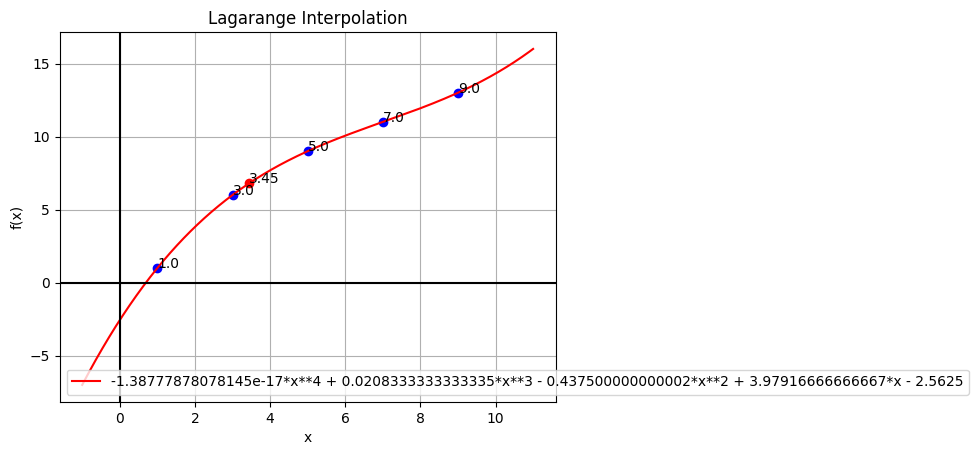

In [ ]:
# to find the lagarange interpolation polynomial for the given data

import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

n = int(input("Enter the no. of data: "))

X = np.array(list(map(float, input("Enter all x-data: ").split())))
y = np.array(list(map(float, input("Enter all y-data: ").split())))

xp = float(input("Enter point to interpolate: "))

x = sp.symbols('x')

poly = 0

for i in range(n):
    lf = 1
    for j in range(n):
        if(j!=i):
            lf *= (x - X[j])/(X[i]-X[j])
    poly += lf * y[i]

poly = sp.simplify(poly)

print("The Lagarange polynomial is:\n", poly)

int_val = poly.subs(x, xp)
print(f"The interpolated value at x = {xp} is {int_val}")

f = sp.lambdify(x, poly, "numpy")
x_val = np.linspace(min(X)-2, max(X)+2, 1000)

#visualize the output
plt.figure()
plt.plot(x_val, f(x_val), color="r", label=poly)
plt.axvline(0, 0, color="black")
plt.axhline(0, 0, color="black")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.title(f"Lagarange Interpolation")
plt.scatter(X, f(X), color="blue")
for i, val in enumerate(X):
    plt.text(val, f(val), f'{val}')
plt.scatter(xp, f(xp), color="red")
plt.text(xp, f(xp), f'{xp}')
plt.show()